# <h2><b>Analysis of Latin documents for word-co-occurrence </b></h2>

Participants: Ashwini Sarode(50205928) & Vivek Singh(50208473)

In [15]:
import pyspark
import time
import glob 
from operator import add
import itertools
from itertools import product
import csv
import os, shutil
from shutil import copyfile
import pandas as pd
import matplotlib.pyplot as plt

<b><i>If you get error for SparkContext intialization, uncomment the follwoing line.</i></b>

In [26]:
# sc = pyspark.SparkContext()

Making dictionary of lemma

In [2]:
#making a lookup table
mydict={}
with open('la.lexicon.csv', mode='r') as infile:
    reader = csv.reader(infile)
    
    for rows in reader:
        rows[0]=rows[0].replace('j','i')
        rows[0]=rows[0].replace('v','u').lower()
        rows[2]=rows[2].lower()
        if mydict.has_key(rows[0]) and rows[2] not in mydict.get(rows[0]):
            val = mydict[rows[0]]
            mydict[rows[0]] = val.append(rows[2])
            mydict[rows[0]] = val
        else:
            val=[]
            val.append(rows[0])
            if rows[2] not in val:
                val.append(rows[2])
            mydict[rows[0]] = val
            # print(mydict)
            

In [3]:
mydict.get("haec")

['haec', 'hic']

Function which return lemmas of the particular word

In [4]:
#look up functon to return lemma list
def returnLemma(l):
    print "value of ",l
    temp=[]
    if mydict.has_key(l):
        return mydict.get(l)
    else:
        temp.append(l)
        return temp
    

mapreduce function which perform lemmatization and emit two gram pairs with its position.

In [7]:
#MR function
timetaken=[]
NoOfFiles=[]
def mapreduce(count,source):
    lines = []
    lines = sc.textFile(source+"*")
    start=time.time()
    location_line = lines.map(lambda line: [elem.strip().encode("utf-8") for elem in line.split('>')])
    reduced_op1=location_line.map(lambda y: (y[0]+">",y[-1].replace('j','i').replace('v','u').lower().split(' ')))\
         .flatMap(lambda (x,z) :[((crosslema),(x,1+z.index(i[0]),1+z.index(i[1])))for i in itertools.combinations(z,2) for crosslema in product(returnLemma(i[0]),returnLemma(i[1]))])\
         .reduceByKey(add)
    filepath="./allop/opforfiles_"+str(count)+".txt"
    print(filepath)
#     reduced_op1.collect()
    reduced_op1.saveAsTextFile(filepath)
    print("Time taken for "+str(count)+" files : "+str(time.time()-start))
    timetaken.append(time.time()-start)
    NoOfFiles.append(count)

In [8]:
path = "./docstotest/"
moveto = "./copiedFile/"
files = os.listdir(path)
files.sort()
count=0
for f in files:
    count=count+1
    src = path+f
    dst = moveto+f
    copyfile(src,dst)
    print "Moving file ",count ,f
    mapreduce(count,moveto)

Moving file  1 ausonius.cupido_cruciatus.tess
./allop/opforfiles_1.txt
Time taken for 1 files : 9.90900015831
Moving file  2 ausonius.de_herediolo.tess
./allop/opforfiles_2.txt
Time taken for 2 files : 10.6619999409
Moving file  3 ausonius.eclogarum_liber.tess
./allop/opforfiles_3.txt
Time taken for 3 files : 13.1440000534
Moving file  4 ausonius.ephemeris_id_est_totius_diei_negotium.tess
./allop/opforfiles_4.txt
Time taken for 4 files : 14.1679999828
Moving file  5 ausonius.epigrammata_ausonii_de_diversis_rebus.tess
./allop/opforfiles_5.txt
Time taken for 5 files : 13.8790001869
Moving file  6 ausonius.griphus_ternarii_numeri.tess
./allop/opforfiles_6.txt
Time taken for 6 files : 14.4120001793
Moving file  7 ausonius.libri_de_fastis_conclusio.tess
./allop/opforfiles_7.txt
Time taken for 7 files : 15.6349999905
Moving file  8 ausonius.ludus_septem_sapientum.tess
./allop/opforfiles_8.txt
Time taken for 8 files : 16.9359998703
Moving file  9 ausonius.mosella.tess
./allop/opforfiles_9.txt

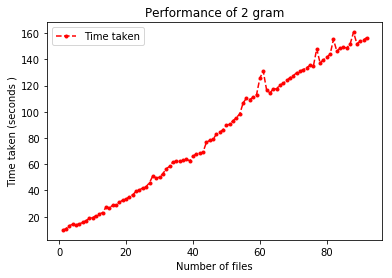

In [9]:
plt.plot(NoOfFiles, timetaken, marker='.', linestyle='--', color='r', label='Time taken')
plt.xlabel('Number of files')
plt.ylabel('Time taken (seconds )')
plt.title('Performance of 2 gram')
plt.legend()
plt.show()

In [10]:
import io
import pandas as pd
d = {'NoOfFiles_2gram': NoOfFiles, 'timetaken': timetaken}
df = pd.DataFrame(data=d)
df.to_csv("2gramOp.csv")

# MR function for 3 gram

mapreduce function which perform lemmatization and emit three gram pairs with its position.

In [22]:
#MR function
timetaken=[]
NoOfFiles=[]
def mapreduce3gram(count):
    lines = []
    lines = sc.textFile("./copiedFile3gram/*")
    start=time.time()
    location_line = lines.map(lambda line: [elem.strip().encode("utf-8") for elem in line.split('>')])
    reduced_op1=location_line.map(lambda y: (y[0]+">",y[-1].replace('j','i').replace('v','u').lower().split(' ')))\
         .flatMap(lambda (x,z) :[((crosslema),(x,1+z.index(i[0]),1+z.index(i[1]),1+z.index(i[2]))) for i in itertools.combinations(z,3) for crosslema in product(returnLemma(i[0]),returnLemma(i[1]),returnLemma(i[2]))])\
         .reduceByKey(add)
    filepath="./allop3gram/opforfiles3gram_"+str(count)+".txt"
    print(filepath)
#     reduced_op1.collect()
    reduced_op1.saveAsTextFile(filepath)
    print("Time taken for "+str(count)+" files : "+str(time.time()-start))
    timetaken.append(time.time()-start)
    NoOfFiles.append(count)

In [23]:
path = "./docstotest/"
moveto = "./copiedFile3gram/"
files = os.listdir(path)
files.sort()
count=0
for f in files:
    count=count+1
    src = path+f
    dst = moveto+f
    copyfile(src,dst)
    print "Moving file ",count ,f
    mapreduce3gram(count)

Moving file  1 ausonius.cupido_cruciatus.tess
./allop3gram/opforfiles3gram_1.txt
Time taken for 1 files : 9.07799983025
Moving file  2 ausonius.de_herediolo.tess
./allop3gram/opforfiles3gram_2.txt
Time taken for 2 files : 11.25
Moving file  3 ausonius.eclogarum_liber.tess
./allop3gram/opforfiles3gram_3.txt
Time taken for 3 files : 12.5479998589
Moving file  4 ausonius.ephemeris_id_est_totius_diei_negotium.tess
./allop3gram/opforfiles3gram_4.txt
Time taken for 4 files : 14.0439999104
Moving file  5 ausonius.epigrammata_ausonii_de_diversis_rebus.tess
./allop3gram/opforfiles3gram_5.txt
Time taken for 5 files : 14.8320000172
Moving file  6 ausonius.griphus_ternarii_numeri.tess
./allop3gram/opforfiles3gram_6.txt
Time taken for 6 files : 16.0939998627
Moving file  7 ausonius.libri_de_fastis_conclusio.tess
./allop3gram/opforfiles3gram_7.txt
Time taken for 7 files : 17.9760000706
Moving file  8 ausonius.ludus_septem_sapientum.tess
./allop3gram/opforfiles3gram_8.txt
Time taken for 8 files : 19.

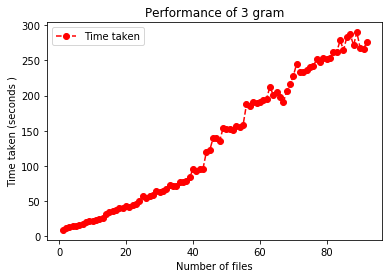

In [24]:
plt.plot(NoOfFiles, timetaken, marker='o', linestyle='--', color='r', label='Time taken')
plt.xlabel('Number of files')
plt.ylabel('Time taken (seconds )')
plt.title('Performance of 3 gram')
plt.legend()
plt.show()

In [25]:
import io
import pandas as pd
d = {'NoOfFiles_3gram': NoOfFiles, 'timetaken': timetaken}
df = pd.DataFrame(data=d)
df.to_csv("3gramOp.csv")

In [1]:
import pandas as pd
xl = pd.ExcelFile("../OutputSample/OUTPUT.xlsx")
Table2gram = pd.DataFrame(xl.parse("2gram"))
Table3gram = pd.DataFrame(xl.parse("3gram"))

In [2]:
Table2gram

,n gram(n=2),"Location(Chapter#, Line#, Position of lemma 1, Position of Lemma 2)"
0,"(('ollus', 'rorem'),","('<aus. cup. cruc. 1.90>', 1, 5))"
1,"(('nec', 'urbe'),","('<aus. idyll. 3. 1.29>', 3, 5))"
2,"(('circumvenio', 'propero'),","('<aus. cup. cruc. 1.81>', 2, 3))"
3,"(('huius', 'stipite'),","('<aus. cup. cruc. 1.59>', 1, 5))"
4,"(('parte', 'omnes'),","('<aus. cup. cruc. 1.37>', 1, 6))"
5,"(('patiar', 'utque'),","('<aus. idyll. 3. 1.30>', 2, 4))"
6,"(('nunc', 'et'),","('<aus. idyll. 3. 1.7>', 1, 3))"
7,"(('transferat', 'ut'),","('<aus. cup. cruc. 1.64>', 1, 2))"
8,"(('mater', 'ago'),","('<aus. cup. cruc. 1.97>', 4, 5))"
9,"(('talia', 'nocturnis'),","('<aus. cup. cruc. 1.99>', 1, 2))"


In [3]:
Table3gram

,n gram(n=3),"Location(Chapter#, Line#, Position of lemma 1, Position of Lemma 2, Position of Lemma 3)"
0,"(('uincula', 'maerentem', 'nullo'),","('<aus. cup. cruc. 1.61>', 1, 2, 3))"
1,"(('rem', 'stare', 'animum'),","('<aus. idyll. 3. 1.11>', 3, 4, 8))"
2,"(('talia', 'simulacra', 'figuris'),","('<aus. cup. cruc. 1.99>', 1, 4, 5))"
3,"(('hostis', 'loca', 'sua'),","('<aus. cup. cruc. 1.52>', 2, 4, 6))"
4,"(('ignoscentum', 'specie', 'tantus'),","('<aus. cup. cruc. 1.75>', 2, 3, 5))"
5,"(('post', 'redeo', 'uersibus'),","('<aus. idyll. 3. 1.0>', 4, 11, 20))"
6,"(('auricomans', 'muricus', 'pingo'),","('<aus. cup. cruc. 1.11>', 3, 5, 6))"
7,"(('aliena', 'in', 'crimina'),","('<aus. cup. cruc. 1.64>', 4, 5, 6))"
8,"(('prior', 'rutilus', 'igneus'),","('<aus. cup. cruc. 1.92>', 2, 4, 6))"
9,"(('paruum', 'fateor,', 'res'),","('<aus. idyll. 3. 1.9>', 1, 3, 7))"
